Get relevant modules and set path

In [27]:
from IPython.display import Image
import pandas as pd
import time
import sys
import os

%load_ext autoreload
%autoreload 2

mypath = '/Users/samanderson/greatbrowser' #your directory here 
sys.path.insert(0, mypath)
os.chdir(mypath)

from greatbrowser import great_get_options, great_analysis, great_global_controls

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Get the sample datasets

In [8]:
data_1 = pd.read_excel('tests/sample_data/sample_data_1.xlsx'); data_1.columns = ['chr', 'start', 'end']
data_2 = pd.read_excel('tests/sample_data/sample_data_2.xlsx')
data_3 = pd.read_csv('tests/sample_data/sample_data_3.csv')
data_4 = pd.read_csv('tests/sample_data/sample_data_4.bed', sep='\t')

To show the available global control options, use great_global_controls()

In [9]:
great_global_controls()

Global Control Keys: Input = GREAT Label:

minFold = Minimum Region-based Fold Enrichment:	int
n_gene_hits or minAnnotFgHitGenes = Observed Gene Hits:	 int
filterText = Term Name Filter:	str
allMinAC = Term Annotation Count Min:	int
allMaxAC = Term Annotation Count Max:	int
sigValue = Statistical Significance Threshhold:	float
view = Significance view:	viewSigByBoth, viewSigByRegion, viewFull


To how the available 'get=' parameter options, use great_get_options()

In [10]:
great_get_options()

"get" Parameter Options:

get = genes 	 returns a dataframe of the inputted data + genes associated with each probe. For large datasets, run multiple iterations and merge dataframes post-hoc using pd.concat
get = ucsc_browser 	 opens ucsc genome browser for the inputted data
get = genes_pivot 	 same as genes, but grouped by gene rather than region
get = n_genes_region 	 saves a barplot showing the number of region with x gene associations, grouped by x, as a png
get = n_genes_TSS 	 saves a batplot showing the distance between each probe/gene pair, grouped by kilobases, as a png
get = n_genes_abs_TSS 	 same as n_genes_TSS but with absolute value being used for distance

The below options all additionally save a png if plot=bar (barplot) or plot=hierarchy (hierarchy plot) (default=False)

get = ensembl_genes 	 returns a dataframe of the Ensembl genes processes associated with the probe set
get = go_process 	 returns a dataframe of the GO biological processes associated with the probe set

To get the genes associated with each inputted region, use get='genes'

In [30]:
gene_df = great_analysis(test_regions=data_1, get='genes', assembly='hg38', #show the desire output, set the desired assembly
                         is_formatted=False, #is the input already properly formatted with headers? Requires either dataframe or path for this, and chr -> index col must be included.
                         df_start='start', df_end='end', df_index='name', df_chr='chr') #set names of corresponding columns in df
gene_df

,chr,start,end,name,associated_genes
0,chr1,4748088,4748507,0,"AJAP1 (+93,253)"
1,chr1,4768378,4780503,1,"AJAP1 (+119,396)"
2,chr1,4848009,4848547,2,"AJAP1 (+193,233)"
3,chr1,5046471,5046985,3,"AJAP1 (+391,683), NPHP4 (+945,743)"
4,chr1,5146655,5146913,4,"AJAP1 (+491,739), NPHP4 (+845,687)"
...,...,...,...,...,...
324,chr1,51570334,51600876,324,"EPS15 (-66,277), OSBPL9 (-31,487)"
325,chr1,51614863,51626735,325,"OSBPL9 (+3,707), NRDC (+258,006)"
326,chr1,51644387,51644755,326,"OSBPL9 (+27,479), NRDC (+234,234)"
327,chr1,51669990,51670401,327,"OSBPL9 (+53,104), NRDC (+208,609)"


Get the Ensembl genes for data_1

In [12]:
#get the outputted ensembl genes
hg_df = great_analysis(test_regions=data_1, get='human_phenotype', assembly='hg38', is_formatted=False, df_index='name', headless=False) #headless=False shows the browser
hg_df

No results meet your chosen criteria.


Get the mouse knockout phenotypes for data_1

In [13]:
#get the outputted mouse knockout phenotypes
mm_ko_df = great_analysis(test_regions=data_1, get='mouse_phenotype_KO', assembly='hg38', is_formatted=False, df_index='name')
mm_ko_df

,term_name,go_annotation,binom_rank,binom_raw_pval,binom_bonferroni_pval,binom_fdr_qval,binom_fold_enrichment,binom_expected,binom_obs_region_hits,binom_genome_fraction,...,hyper_rank,hyper_raw_pval,hyper_bonferroni_pval,hyper_fdr_qval,hyper_fold_enrichment,hyper_expected,hyper_obs_gene_hits,hyper_total_genes,hyper_gene_set_coverage,hyper_term_gene_coverage
0,decreased monocyte cell number,MP:0000223,4,2.6220e-26,2.4010e-22,6.0025e-23,12.5799,2.7027,34,0.0082,...,5,6.7881e-15,6.2158e-11,1.2432e-11,13.6205,1.2481,17,108,7.83%,15.74%
1,abnormal monocyte cell number,MP:0012441,13,1.4053e-17,1.2868e-13,9.8986e-15,6.2903,5.5641,35,0.0169,...,7,4.7665e-11,4.3646e-7,6.2352e-8,7.3817,2.4385,18,211,8.29%,8.53%
2,abnormal monocyte morphology,MP:0002620,15,3.1986e-17,2.9290e-13,1.9527e-14,6.1204,5.7186,35,0.0174,...,8,7.0303e-11,6.4377e-7,8.0471e-8,7.2108,2.4962,18,216,8.29%,8.33%
3,abnormal NMDA-mediated synaptic currents,MP:0002888,34,3.6177e-12,3.3127e-8,9.7433e-10,19.1322,0.6272,12,0.0019,...,17,4.6752e-5,4.2811e-1,2.5183e-2,19.2289,0.2080,4,18,1.84%,22.22%
4,increased Ly6C high monocyte number,MP:0013022,61,4.1780e-10,3.8258e-6,6.2717e-8,14.8043,0.7430,11,0.0023,...,1,9.3039e-19,8.5196e-15,8.5196e-15,34.6120,0.4045,14,35,6.45%,40.00%
5,decreased Ly6C low monocyte number,MP:0013026,75,5.0323e-9,4.6081e-5,6.1441e-7,11.6150,0.9470,11,0.0029,...,2,1.2130e-16,1.1107e-12,5.5537e-13,25.7749,0.5432,14,47,6.45%,29.79%
6,abnormal Ly6C high monocyte number,MP:0013021,99,1.0250e-7,9.3859e-4,9.4807e-6,8.5991,1.2792,11,0.0039,...,3,5.9699e-16,5.4666e-12,1.8222e-12,23.2965,0.6009,14,52,6.45%,26.92%
7,abnormal Ly6C low monocyte number,MP:0013024,103,1.2878e-7,1.1792e-3,1.1449e-5,8.4024,1.3092,11,0.0040,...,4,1.4252e-15,1.3050e-11,3.2626e-12,22.0258,0.6356,14,55,6.45%,25.45%
8,abnormal mononuclear phagocyte morphology,MP:0008248,133,1.3508e-6,1.2370e-2,9.3004e-5,2.3396,16.2424,38,0.0494,...,14,4.1634e-6,3.8124e-2,2.7231e-3,3.2408,6.1713,20,534,9.22%,3.75%
9,abnormal phagocyte morphology,MP:0008251,159,8.1722e-6,7.4833e-2,4.7065e-4,2.0637,20.3516,42,0.0619,...,18,5.3349e-5,4.8852e-1,2.7140e-2,2.6335,7.9741,21,690,9.68%,3.04%


Now plot the mouse knockout phenotypes for data_1 as a hierarchy plot, using GREAT's built-in functionality, and set a custom name so that it is saved to the sample output folder

PNG image downloaded successfully as 'tests/sample_figures/mouse_phenotype_KO_hierarchy_plot.png'


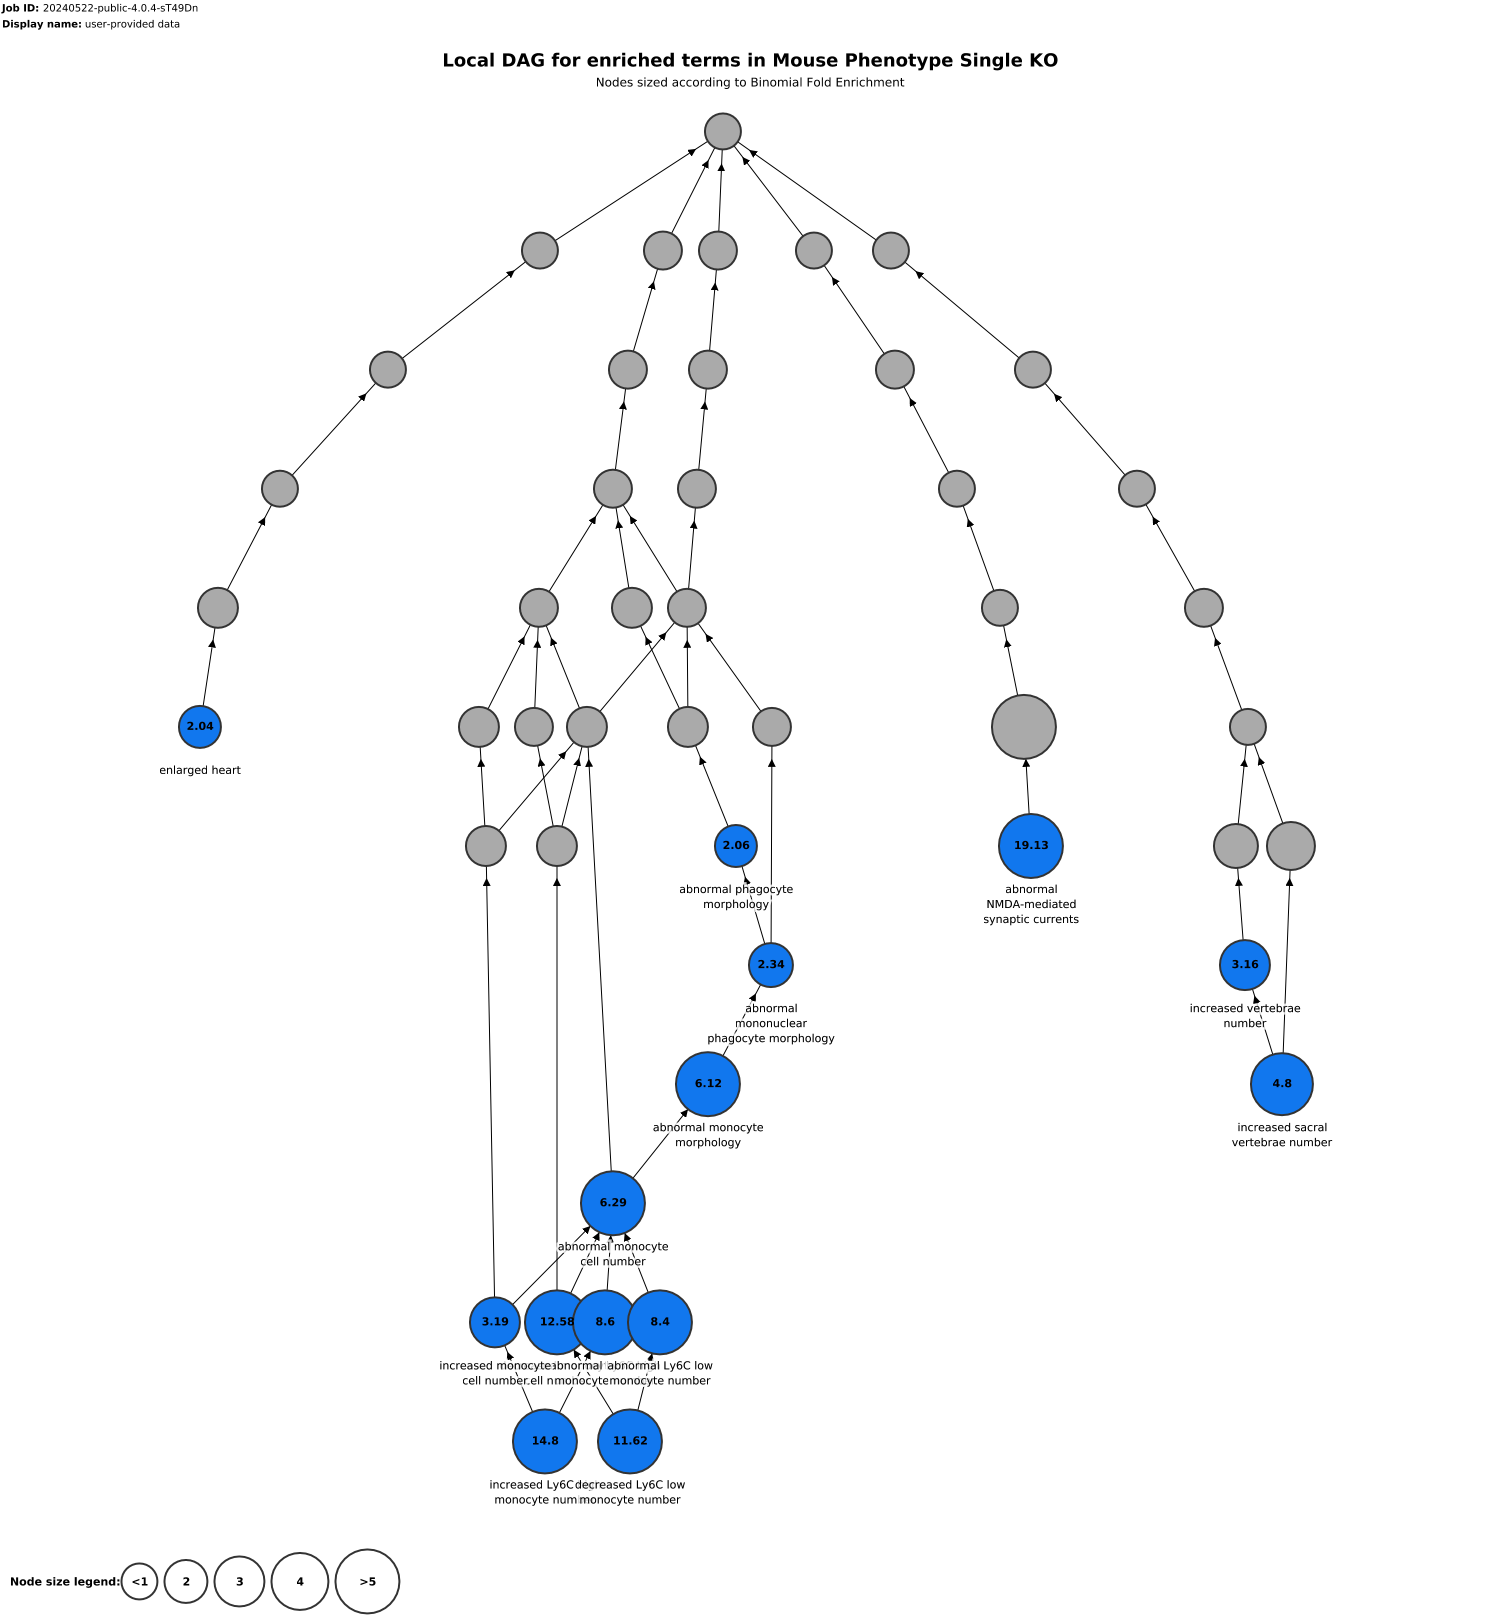

In [14]:
#now plot the mouse phenotype KO using GREATs built in functionality, and save the file
mm_ko_df = great_analysis(test_regions=data_1, get='mouse_phenotype_KO', assembly='hg38', is_formatted=False, 
                          df_index='name', plot='hierarchy', file_name='tests/sample_figures/mouse_phenotype_KO_hierarchy_plot')

Image(filename='tests/sample_figures/mouse_phenotype_KO_hierarchy_plot.png') 

Now lets output this as a barplot, tweaking some of the global settings

PNG image downloaded successfully as 'tests/sample_figures/the_bar.png'


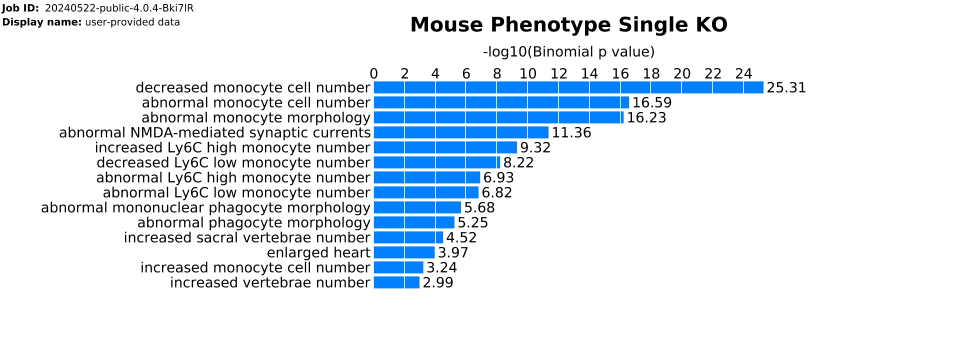

In [16]:
#tweak the global controls and other settings to specify which criteria you want to use for analysis
mm_ko_df2 = great_analysis(test_regions=data_1, get='mouse_phenotype_KO', assembly='hg38', 
                           is_formatted=False, df_index='name', plot='bar', assoc_criteria='two_closest', #use two closest genes for associations
                           global_controls = {'sigValue' : 0.01},  #custom file name and settings, pval thresh = 0.01
                           file_name='tests/sample_figures/the_bar')

Image(filename='tests/sample_figures/the_bar.png') 

Now try out several other formats

In [29]:
#csv
gene_df = great_analysis(test_regions=data_3, get='genes', assembly='mm10', df_index='index', 
                             df_chr='chr_mm10', df_start = 'pos_mm10', df_end='end_mm10')
gene_df.head()

,chr_mm10,pos_mm10,end_mm10,index,associated_genes
0,chr12,75515718,75515720,cg00101675_BC21,"Gphb5 (-98,938), Ppp2r5e (+80,481)"
1,chr15,12170849,12170851,cg00116289_BC21,"Mtmr12 (-34,178), Zfr (+53,019)"
2,chrX,57387383,57387385,cg00211372_TC21,"Arhgef6 (-48,655), Rbmx (+5,652)"
3,chr19,6375936,6375938,cg00531009_BC21,"Pygm (-8,462), Sf1 (+12,247)"
4,chr18,35572741,35572743,cg00747726_TC21,"Paip2 (-25,907), Matr3 (+10,584)"


In [28]:
#csv by path
gene_df = great_analysis(test_regions='tests/sample_data/sample_data_3.csv', get='genes', assembly='mm10', df_index='index', 
                             df_chr='chr_mm10', df_start = 'pos_mm10', df_end='end_mm10')
gene_df.head()

['Gphb5 (-98,938), Ppp2r5e (+80,481)', 'Mtmr12 (-34,178), Zfr (+53,019)', 'Arhgef6 (-48,655), Rbmx (+5,652)', 'Pygm (-8,462), Sf1 (+12,247)', 'Paip2 (-25,907), Matr3 (+10,584)', 'Scamp3 (-7,810), Clk2 (+4,885)', 'A830031A19Rik (-3,014), Bcl11a (-105)', 'Lbx1 (-94,270), Btrc (-33,669)', 'Hoxa11 (+21)', 'Tbc1d5 (+130,340), Gm7334 (+350,303)', 'Nnmt (-73,423), Zbtb16 (+157,369)', 'Erg (+71,027), Kcnj15 (+201,780)', 'Hoxc6 (-11,378), Hoxc8 (+7,588)', 'Dlx6 (+6,070), Dlx5 (+12,681)', 'Ebf3 (-254)', 'Mvb12b (-53,703), Pbx3 (+430,395)', 'Hnrnpu (+8,498), Cox20 (+10,169)', 'Col23a1 (-16,916), Clk4 (+9,890)', 'Setd5 (+32,562), Lhfpl4 (+85,457)', 'Zfhx4 (+23,855), Pex2 (+333,741)', 'Hoxb6 (-45)', 'Pbx1 (+246,879), Lmx1a (+495,461)', 'Cgnl1 (-204,603), Tcf12 (+135,642)', 'Gpr45 (-79,598), Mrps9 (+22,132)', 'Gtdc1 (-159,657), Zeb2 (+96,116)', 'Gtdc1 (-248,503), Zeb2 (+7,270)', 'Gtdc1 (-248,506), Zeb2 (+7,267)', 'Foxo6 (+4,771), Edn2 (+121,372)', 'Mdfic (-527,213), Foxp2 (+292,099)', 'Sp5 (-34)', '

,chr_mm10,pos_mm10,end_mm10,index,associated_genes
0,chr12,75515718,75515720,cg00101675_BC21,"Gphb5 (-98,938), Ppp2r5e (+80,481)"
1,chr15,12170849,12170851,cg00116289_BC21,"Mtmr12 (-34,178), Zfr (+53,019)"
2,chrX,57387383,57387385,cg00211372_TC21,"Arhgef6 (-48,655), Rbmx (+5,652)"
3,chr19,6375936,6375938,cg00531009_BC21,"Pygm (-8,462), Sf1 (+12,247)"
4,chr18,35572741,35572743,cg00747726_TC21,"Paip2 (-25,907), Matr3 (+10,584)"


In [ ]:
#BED, for a very long dataset (>200,000 regions, for which only get='genes' is supported)
gene_df = great_analysis(test_regions=data_4, get='genes', assembly='mm10')
gene_df.head()

,chr,start,end,index,associated_genes
0,chr12,75515718,75515720,cg00101675_BC21,"[Gphb5 (-98,938), Ppp2r5e (+80,481)]"
1,chr15,12170849,12170851,cg00116289_BC21,"[Mtmr12 (-34,178), Zfr (+53,019)]"
2,chrX,57387383,57387385,cg00211372_TC21,"[Arhgef6 (-48,655), Rbmx (+5,652)]"
3,chr19,6375936,6375938,cg00531009_BC21,"[Pygm (-8,462), Sf1 (+12,247)]"
4,chr18,35572741,35572743,cg00747726_TC21,"[Paip2 (-25,907), Matr3 (+10,584)]"


In [32]:
#BED by path, for a very long dataset (>200,000 regions, for which only get='genes' is supported)
gene_df = great_analysis(test_regions='tests/sample_data/sample_data_4.bed', get='genes', assembly='mm10')
gene_df.head()

,chr,start,end,index,associated_genes
0,chr12,75515718,75515720,cg00101675_BC21,"Gphb5 (-98,938), Ppp2r5e (+80,481)"
1,chr15,12170849,12170851,cg00116289_BC21,"Mtmr12 (-34,178), Zfr (+53,019)"
2,chrX,57387383,57387385,cg00211372_TC21,"Arhgef6 (-48,655), Rbmx (+5,652)"
3,chr19,6375936,6375938,cg00531009_BC21,"Pygm (-8,462), Sf1 (+12,247)"
4,chr18,35572741,35572743,cg00747726_TC21,"Paip2 (-25,907), Matr3 (+10,584)"
